In [1]:
import numpy as np

In [21]:
N = 500

phi_r1 = 2 * np.pi * np.random.rand(N)
R_r1 = (15 / (1 - 0.7*np.cos(phi_r1+np.pi/3))) * np.random.rand(N)
X0 = R_r1 * np.cos(phi_r1) + 0
Y0 = R_r1 * np.sin(phi_r1) + 0

XY0 = np.c_[X0, Y0]

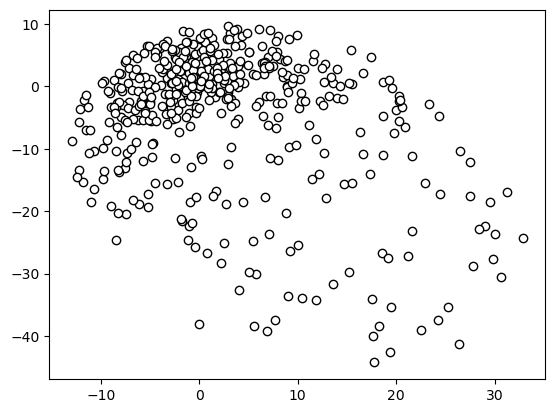

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X0, Y0, c='w', edgecolors='k')
plt.show()

In [23]:
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

[ 2.40905582 -4.09933169]


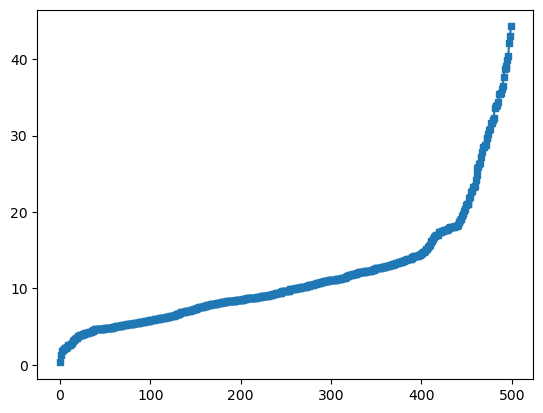

In [24]:
c0 = pca.location(XY0)
print(c0)
plt.plot(sorted(pca.distance_center(XY0, c0)), marker='s', markersize=4)
plt.show()

[-1.85058411 -0.80172279]


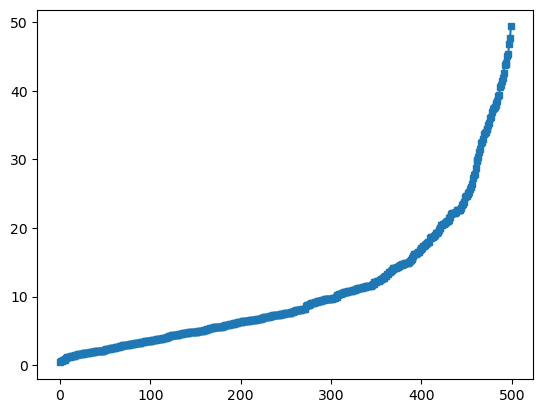

In [35]:
alpha = (N-25)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.7, 0.001))
c = pca.robust_location(XY0, wma)
print(c)
plt.plot(sorted(pca.distance_center(XY0, c)), marker='s', markersize=4)
plt.show()

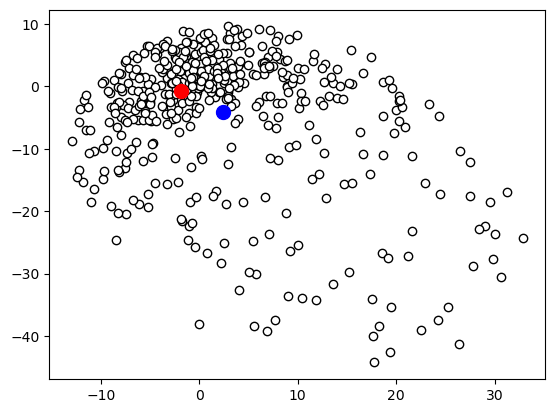

In [36]:
plt.scatter(X0, Y0, c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='b')
plt.scatter([c[0]], [c[1]], s=100, c='r')
plt.show()

In [37]:
XY1 = XY0 - c
XY1_0 = XY0 - c0

In [38]:
a1_0, L1_0 = pca.find_pc(XY1_0)
print(L1_0, a1_0)

132.46172785524416 [ 0.50829863 -0.86118087]


In [39]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.7, 0.001))
a1, L1 = pca.find_robust_pc(XY1, wma)
print(L1, a1)

55.846771420978826 [0.74148365 0.67097093]


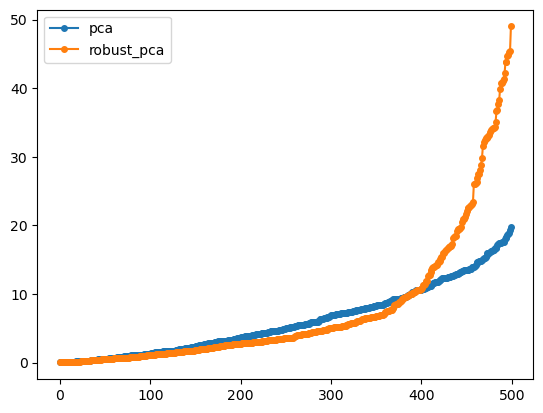

In [40]:
plt.plot(sorted(pca.distance_line(XY1_0, a1_0)), marker='o', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='o', markersize=4, label='robust_pca')
plt.legend()
plt.show()

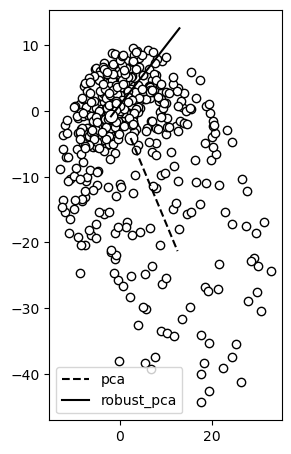

In [41]:
aa = 16/9
plt.figure(figsize=(3,3*aa))
plt.scatter(XY0[:,0], XY0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
plt.plot([c0[0], c0[0]+20*a1_0[0]], [c0[1], c0[1]+20*a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+20*a1[0]], [c[1], c[1]+20*a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()